In [13]:
%pylab inline

from __future__ import division
from time import strftime
from calendar import monthrange
from datetime import datetime, date, timedelta
print strftime('%Y-%m-%d %X'), 'clock set'
import random
import pandas as pd
import numpy as np

import sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

Populating the interactive namespace from numpy and matplotlib
2015-05-27 15:39:13 clock set


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")
train = pd.read_csv('../input/train.csv', parse_dates=['Date'], date_parser=date_parser)[['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent']]
X_test = pd.read_csv('../input/test.csv', parse_dates=['Date'], date_parser=date_parser)[['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy']]
print train.shape, X_test.shape

(10506, 12) (116293, 10)


In [30]:
X_given = train[['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy']]
y_given = train['WnvPresent']

msk = np.random.rand(len(X_given)) < 0.8
X_train, X_validate, y_train, y_validate = X_given[msk], X_given[~msk], y_given[msk], y_given[~msk]

print X_train.shape, X_validate.shape, y_train.shape, y_validate.shape

(8466, 10) (2040, 10) (8466,) (2040,)


In [80]:
X_train.loc[:, 'Year'] = [i.year for i in X_train.ix[:, 'Date']]
X_validate.loc[:, 'Year'] = [i.year for i in X_validate.ix[:, 'Date']]

X_train.loc[:, 'Week'] = [i.week for i in X_train.ix[:, 'Date']]
X_validate.loc[:, 'Week'] = [i.week for i in X_validate.ix[:, 'Date']]

X_train.loc[:, 'Day'] = [i.timetuple().tm_yday for i in X_train.ix[:, 'Date']]
X_validate.loc[:, 'Day'] = [i.timetuple().tm_yday for i in X_validate.ix[:, 'Date']]

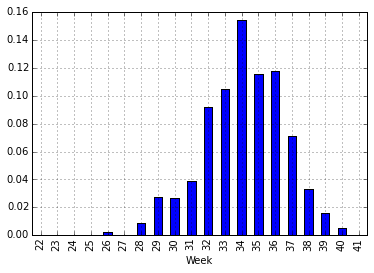

In [51]:
probaByWeek = pd.concat([X_train, y_train], axis=1).groupby('Week')['WnvPresent'].mean()
probaByWeek.plot(kind='bar')

AUC: 0.787129056758
[ 1.15434084  0.15434084  0.11747851  0.11566265  0.10485133  0.092257
  0.07142857  0.03907816  0.03284672  0.02725367  0.02671119  0.01570681
  0.00893997  0.00507614  0.00249377  0.        ]


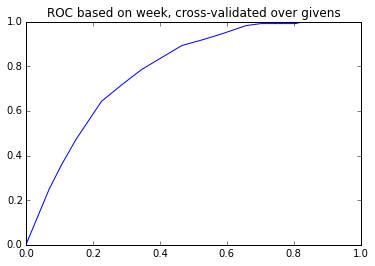

In [70]:
z = [probaByWeek[i.week] for i in X_validate.ix[:, 'Date']]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_validate, z)
print 'AUC:', sklearn.metrics.auc(fpr, tpr)
print thresholds
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC based on week, cross-validated over givens')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)


In [146]:
proba2007 = pd.concat([X_train.ix[X_train['Year']==2007], y_train.ix[X_train['Year']==2007]], axis=1).groupby('Day')['WnvPresent'].mean()
proba2009 = pd.concat([X_train.ix[X_train['Year']==2009], y_train.ix[X_train['Year']==2009]], axis=1).groupby('Day')['WnvPresent'].mean()
proba2011 = pd.concat([X_train.ix[X_train['Year']==2011], y_train.ix[X_train['Year']==2011]], axis=1).groupby('Day')['WnvPresent'].mean()
proba2013 = pd.concat([X_train.ix[X_train['Year']==2013], y_train.ix[X_train['Year']==2013]], axis=1).groupby('Day')['WnvPresent'].mean()



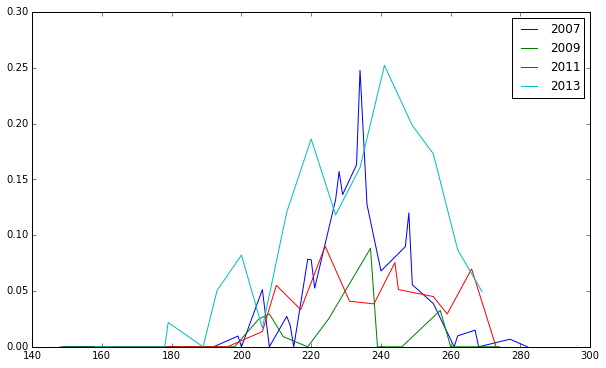

In [152]:
plt.figure(figsize=(10,6))
plt.plot(proba2007.index, proba2007, label='2007')
plt.plot(proba2009.index, proba2009, label='2009')
plt.plot(proba2011.index, proba2011, label='2011')
plt.plot(proba2013.index, proba2013, label='2013')
plt.legend()

In [135]:
print proba2007.index

Int64Index([22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41], dtype='int64')
